In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

2024-04-01 19:05:08.658135: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./../ejerciciosModelosSupervisados/deteccion_transacciones_fraudulentas/datos/data_fraude.csv')

In [3]:
# pre-process datos (si es necesario)
df = df.rename(columns={'0.1':'Class'}).drop('Unnamed: 0',axis=1)

In [4]:
yvar = df.Class
xvars = df[[x for x in df.columns if x != 'Class']]

In [5]:
# dividir train / test para variables independientes (x)  y dependiente (y)
xtrain, xtest, ytrain, ytest = train_test_split(xvars, yvar, train_size = 0.80, random_state = 2)

In [6]:
# convertir datos en numpy arrays

xtrain = np.array(xtrain)
xtest= np.array(xtest)
ytrain = np.array(ytrain).squeeze()
ytest = np.array(ytest).squeeze()

In [7]:
# arquitectura del modelo utilizando variables - FUNCTIONAL API

# input
model_input = Input(shape=(xtrain.shape[1],))
# primera capa
layer_1 = Dense(256, kernel_regularizer='l2', activation='relu')(model_input)
#segunda capa
layer_2 = Dense(256, kernel_regularizer='l2', activation='relu')(layer_1)
# predicción
model_output = Dense(1, activation = 'sigmoid')(layer_2)
# entrada y salida
model = Model(inputs=model_input, 
              outputs=model_output)

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002)

model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [9]:
history = model.fit(
    xtrain,
    ytrain,
    epochs=200,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=2, min_delta=0.001, patience=10),
                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5)],
    validation_data=(xtest, ytest)
)

Epoch 1/200
113/113 [==============================] - 1s 4ms/step - loss: 2.7580 - val_loss: 2.1847 - lr: 2.0000e-04
Epoch 2/200
113/113 [==============================] - 0s 2ms/step - loss: 1.8060 - val_loss: 1.4362 - lr: 2.0000e-04
Epoch 3/200
113/113 [==============================] - 0s 2ms/step - loss: 1.1974 - val_loss: 0.9544 - lr: 2.0000e-04
Epoch 4/200
113/113 [==============================] - 0s 2ms/step - loss: 0.8088 - val_loss: 0.6508 - lr: 2.0000e-04
Epoch 5/200
113/113 [==============================] - 0s 2ms/step - loss: 0.5659 - val_loss: 0.4632 - lr: 2.0000e-04
Epoch 6/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4167 - val_loss: 0.3473 - lr: 2.0000e-04
Epoch 7/200
113/113 [==============================] - 0s 2ms/step - loss: 0.3229 - val_loss: 0.2765 - lr: 2.0000e-04
Epoch 8/200
113/113 [==============================] - 0s 2ms/step - loss: 0.2641 - val_loss: 0.2291 - lr: 2.0000e-04
Epoch 9/200
113/113 [==============================] - 0

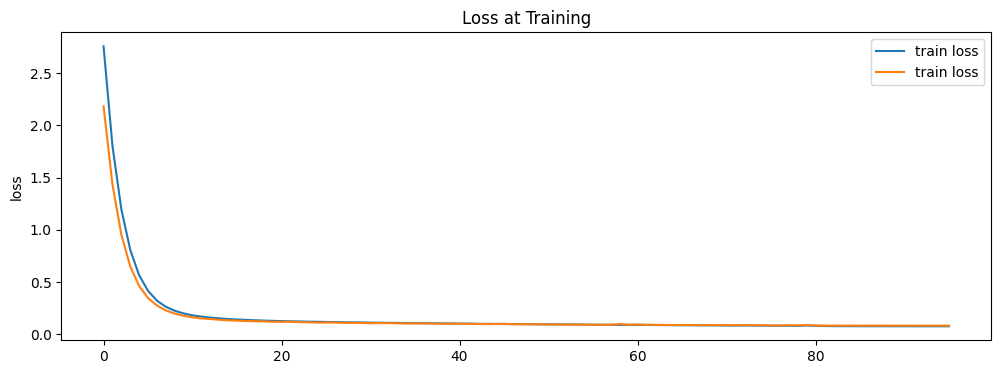

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(history.history['loss'])), history.history['loss'], label='train loss')
ax.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='train loss')
ax.legend()
plt.ylabel("loss")
plt.title('Loss at Training')
plt.show()